In [1]:
# Benjamin Chodroff, benjamin.chodroff@gmail.com
# With lots of love from my wife, Zheng Gao
# 2013
# Built using Python 2.7
import os
import requests
import collections
import json

In [2]:
# Convert diamond qualities into numbers using a dictionary
colorsDict = {"D":1,"E":2,"F":3,"G":4,"H":5,"I":6,"J":7,"K":8,"L":9,"M":10,"N":11,"O":12,"P":13,"Q":14,"R":14,"S":15,"T":16,"U":17,"V":18,"W":19,"X":20,"Y":21,"Z":22}
clarityDict = {"FL":1,"IF":2,"VVS1":3,"VVS2":4,"VS1":5,"VS2":6,"SI1":7,"SI2":8,"SI3":9,"I1":10,"I2":11,"I3":12}
giacutDict = {"Excellent":1, "Very Good": 2, "Good":3,"Fair":4,"Poor":5,"n/a":6}
dshapes = {"round":1,"princess":8,"emerald":4,"oval":6,"marquise":5,"pear":3,"asscher":15,"cushion":14,"radiant":7,"heart":10,"european":11,"trilliant":9,"oldminer":12,"flanders":13}

In [3]:
# Compare your diamond to the internet
# How many carats is your diamond?
ycar = 1.8

# What shape is your diamond? (See dshapes above)
yshape = "round"

# What color? (See colorsDict)
ycol = "G"

# What clarity? (see clarityDict)
ycla = "VS2"

# What quality cut? (see giacutDict)
ycut = "Excellent"

# What is the price in USD?
ypri = 20491

# Minimum and maximum specs to compare against on pricescope.com
# Recommend +- 0.2 carat size based on your diamond size
# let me know your cluster analysis! 
minCar = 1.6
maxCar = 2.0
minCol = "K"
maxCol = "D"
minCla = "I3"
maxCla = "FL"
minCut = "Fair"
maxCut = "Excellent"

In [4]:
# An array of all the diamonds (dictionaries) we find
diamonds = []

In [5]:
print "Finding diamonds:"
print "\tShape=",yshape
print "\tCarats=",str(minCar),"-", str(maxCar)
print "\tColor=",str(minCol),"-",str(maxCol)
print "\tClarity=",str(minCla),"-",str(maxCla)
print "\tCut=",str(minCut),"-",str(maxCut)

Finding diamonds:
	Shape= round
	Carats= 1.6 - 2.0
	Color= K - D
	Clarity= I3 - FL
	Cut= Fair - Excellent


In [6]:
# There is a lack of good error checking throughout this process, my apologies
shape=dshapes[yshape]
print "Finding", yshape,"shaped diamonds with carat sizes from", str(minCar), "to", str(maxCar)
#download up to 1000 pages of results before giving up
for i in range(1,1001):
        print "\tDownloading page",str(i),":"
        # The URL we found while using Google Developer Tools for XHR requests
        url='https://www.pricescope.com/diamonds/api/ps_dl/d_s'
        # This ensures we identify ourselves as a valid browser and that we expect json responses
        headers = { 'user-agent' : 'Mozilla/5.0', 'content-type' : 'text/json' }
        # The payload is the question we wish to ask, but we modify it to iteratively 
        # loop through the shapes and pages. Note - some of the mins/maxes are reversed!
        payload = '{"df":{"vendor":-1,"inhouse":-1,"shape":'+str(shape)+',"fancy_shape":1,"minprice":1,"maxprice":1600000,"minfancy_price":0,"maxfancy_price":1600000,"mincarat":'+str(minCar)+',"maxcarat":'+str(maxCar)+',"minfancy_carat":0.23,"maxfancy_carat":21.7,"mindepth":0,"maxdepth":100,"mintable":0,"maxtable":100,"mincut":'+str(giacutDict[maxCut])+',"maxcut":'+str(giacutDict[minCut])+',"mincolor":'+str(colorsDict[maxCol])+',"maxcolor":'+str(colorsDict[minCol])+',"fancy_color":1,"minfancy_intensity":1,"maxfancy_intensity":9,"minfancy_overtone":1,"maxfancy_overtone":9,"minclarity":'+str(clarityDict[maxCla])+',"maxclarity":'+str(clarityDict[minCla])+',"minsymmetry":1,"maxsymmetry":8,"minpolish":1,"maxpolish":8,"minflourescence":1,"maxflourescence":6,"checkbox_panel1":"04","checkbox_panel2":"","fancy_checkbox_panel2":"","sort":"","fancy_sort":"","page":'+str(i)+',"pageview":"96","adv":false,"fancy_adv":false},"dp":0}'
        # Submits a POST request to the URL using our payload and headers
        r = requests.post(url, data=payload, headers=headers)
        # Basic check to see if the response code is valid
        if not r.ok:
            print "\t\tUnexpected error encountered while downloading page, skipping"
            break     
        # Open up the page results into a json object
        diamondpage = json.loads(r.text)
        # See how many diamonds were found
        foundnumdiamonds = len(diamondpage['d'])
        foundtotaldiamonds = diamondpage['s']
        

        if(foundnumdiamonds>0):
            diamonds+= diamondpage['d']
            diamondstogo = foundtotaldiamonds - len(diamonds) 
            print "\t\tFound",str(foundnumdiamonds),"diamonds.",str(diamondstogo),"diamonds to go"
            # Append the diamonds it found in this page to our diamonds array
            
        else:
            print "\t\tNo more diamonds found."
            # If this page has no diamonds on it, we are done with this page
            break
print "Finished searching for all diamond shapes!"


Finding round shaped diamonds with carat sizes from 1.6 to 2.0
		Found 100 diamonds. 6149 diamonds to go
		Found 100 diamonds. 6049 diamonds to go
		Found 100 diamonds. 5949 diamonds to go
		Found 100 diamonds. 5849 diamonds to go
		Found 100 diamonds. 5749 diamonds to go
		Found 100 diamonds. 5649 diamonds to go
		Found 100 diamonds. 5549 diamonds to go
		Found 100 diamonds. 5449 diamonds to go
		Found 100 diamonds. 5349 diamonds to go
		Found 100 diamonds. 5249 diamonds to go
		Found 100 diamonds. 5149 diamonds to go
		Found 100 diamonds. 5049 diamonds to go
		Found 100 diamonds. 4949 diamonds to go
		Found 100 diamonds. 4849 diamonds to go
		Found 100 diamonds. 4749 diamonds to go
		Found 100 diamonds. 4649 diamonds to go
		Found 100 diamonds. 4549 diamonds to go
		Found 100 diamonds. 4449 diamonds to go
		Found 100 diamonds. 4349 diamonds to go
		Found 100 diamonds. 4249 diamonds to go
		Found 100 diamonds. 4149 diamonds to go
		Found 100 diamonds. 4049 diamonds to go
		Found 100 d

In [7]:
print "Found a total of",str(len(diamonds)),"unique diamonds"

Found a total of 6249 unique diamonds


In [8]:
# Save the results into diamond.txt (overwrite) in case you want to use it later
f = open('diamonds.txt', 'w')
for i in diamonds:
    f.write(str(i))
f.close()

In [9]:
# R Libraries
import rpy2
from rpy2.robjects.packages import importr
import rpy2.robjects as ro

# See the plot in jupyter notebook
from IPython.core.display import Image

In [10]:
r_base = importr('base')
stats = importr('stats')
graphics = importr('graphics')
labels = "carat,color,clarity,cut,price"

In [11]:
carat = []
color = []
clarity = []
giacut = []
price = []

In [12]:
for diamond in diamonds:
    carat.append(diamond['Size'])
    color.append(colorsDict[diamond['Color']])
    clarity.append(clarityDict[diamond['Clarity']])
    giacut.append(giacutDict[diamond['GIACutGrade']])
    price.append(diamond['Price'])

In [13]:
carat = ro.FloatVector(carat)
color = ro.IntVector(color)
clarity = ro.IntVector(clarity)
giacut = ro.IntVector(giacut)
price = ro.FloatVector(price)
ro.globalenv["carat"] = carat
ro.globalenv["color"] = color
ro.globalenv["clarity"] = clarity
ro.globalenv["giacut"] = giacut
ro.globalenv["price"] = price

In [14]:
print "Building Model"
res = stats.lm("price ~ carat + color + clarity + giacut ")
print "Building Prediction"
pred = stats.predict(res)
summary = r_base.summary(res)
ars = "Adjusted R Squared = " + str(round(summary[8][0],2))
print ars
coef = summary.rx2('coefficients')[0:6]
formula = "Price = " + str(int(round(coef[0]))) + " + " + str(int(round(coef[1]))) + "*Carats + " + str(int(round(coef[2]))) + "*Color + " + str(int(round(coef[3]))) + "*Clarity + " + str(int(round(coef[4]))) + " *Cut" 
print formula

Building Model
Building Prediction
Adjusted R Squared = 0.8
Price = 927 + 18837*Carats + -2035*Color + -1749*Clarity + 546 *Cut


Comparing Actual to Predicted Price Fit
Writing plot to prediction.png


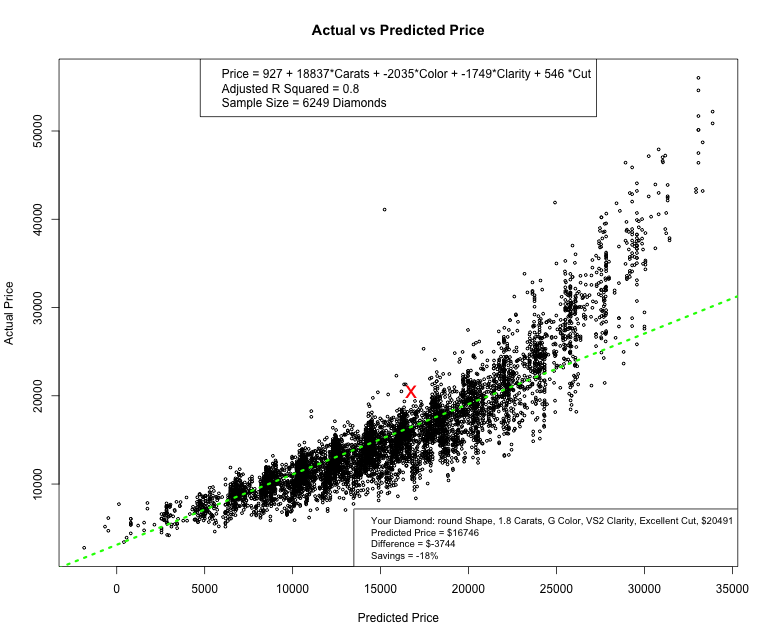

In [15]:
print "Comparing Actual to Predicted Price Fit"
ro.globalenv["pred"] = pred
comp = stats.lm("pred ~ price")
plotfile='prediction.png'
print "Writing plot to",plotfile
ro.r.png(plotfile, width=768, height=640)
ro.r.plot([x for x in pred],[y for y in price], main="Actual vs Predicted Price",xlab="Predicted Price",ylab="Actual Price", cex=0.5)

ro.r.abline(comp,col="green",lty="dotted",lwd=3)

ypred = coef[0] + coef[1]*ycar + coef[2]*colorsDict[ycol] + coef[3]*clarityDict[ycla] + coef[4]*giacutDict[ycut]
Sdiam = "Your Diamond: " + yshape + " Shape, " + str(ycar) + " Carats, " + str(ycol) + " Color, " + str(ycla) + " Clarity, " + str(ycut) + " Cut, $" + str(ypri)
Spred = "Predicted Price = $" + str(int(round(ypred)))
Sdiff = "Difference = $" + str(int(ypred-ypri))
savings = int(round(100*((ypred-ypri)/ypri)))
Ssavings = "Savings = " + str(savings) + "%"
ro.r.points(ypred,ypri,col="red",pch='x',cex=2)
ro.r.legend("bottomright",legend=[Sdiam,Spred,Sdiff,Ssavings], bg = "white",cex=0.8)

ro.r.legend("top",legend=[formula,ars,"Sample Size = " + str(len(price))+" Diamonds"], bg = "white")
ro.r('dev.off()')

Image(filename='prediction.png')

In [16]:
if (savings<0):
    print "Watch out! Your diamond is "+str(abs(savings))+"% more expensive than predicted online market rates"
else:
    print "Congratulations! Your diamond is "+str(savings)+"% less expensive than predicted online market rates"

Watch out! Your diamond is 18% more expensive than predicted online market rates


In [17]:
# TODO: Figure out how to use ggplot2
# TODO: Make the graph interactive so you can hover over different diamond details
# TODO: Automated clustering analysis